## Fake and Real News Classification

ISOT Fake News detection dataset (binary text classification)

In [1]:
import zipfile
import os

extract = 'folder'

with zipfile.ZipFile('archive.zip', 'r') as k:
    k.extractall(extract)
    
print('Unzipping Complete')

Unzipping Complete


In [2]:
import pandas as pd

fake_df = pd.read_csv('folder/Fake.csv')
true_df = pd.read_csv('folder/True.csv')

In [3]:
fake_df.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [4]:
fake_df['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [5]:
fake_df['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [6]:
fake_df['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [7]:
# Fake news is labeled as 0 while True news is labeled as 1

fake_df['label'] = 0
true_df['label'] = 1

news = pd.concat([fake_df, true_df], ignore_index=True)

# Shuffle the dataset

news = news.sample(frac=1, random_state = 24).reset_index(drop=True)

news.head(2)

,title,text,subject,date,label
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politicsNews,"December 5, 2017",1


In [8]:
news['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

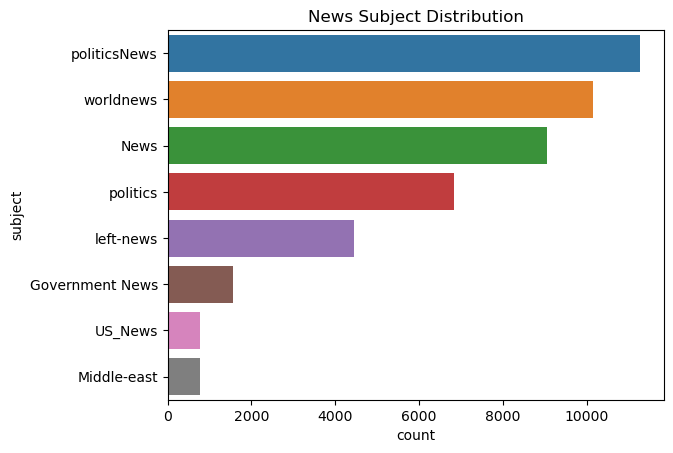

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=news, y='subject', order=news['subject'].value_counts().index)
plt.title('News Subject Distribution')
plt.show()

In [10]:
news['label'].value_counts()

0    23481
1    21417
Name: label, dtype: int64

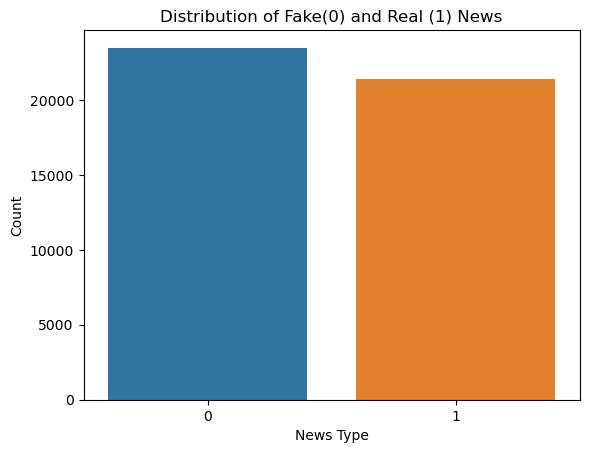

In [11]:
sns.countplot(data=news, x='label')
plt.title('Distribution of Fake(0) and Real (1) News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [12]:
# Standardize the Subject category name

subject_map = {
   'politicsNews': 'politics',
   'worldnews' : 'world',
   'News': 'world',
   'politics' : 'politics',
   'left-news' : 'politics_left',
   'Government News' : 'government',
   'US_News' : 'US',
   'Middle-east' : 'middle_east'
}

news['subject'] = news['subject'].map(subject_map)

news['subject'].value_counts()

world            19195
politics         18113
politics_left     4459
government        1570
US                 783
middle_east        778
Name: subject, dtype: int64

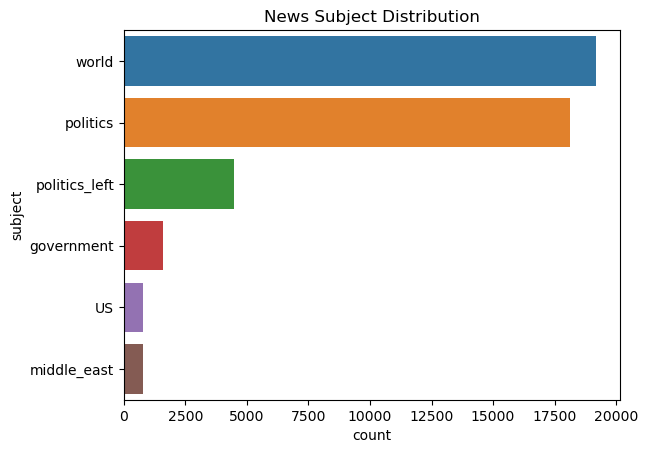

In [13]:
# Distribution after standardising the subject category name

sns.countplot(data=news, y='subject', order=news['subject'].value_counts().index)
plt.title('News Subject Distribution')
plt.show()

In [14]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [15]:
print(news['text'].sample(10, random_state=42))

22216    WASHINGTON (Reuters) - The U.S. Supreme Court ...
27917     LOS ANGELES (Reuters) - California lawmakers,...
25007    NEW YORK (Reuters) - National Football League ...
1377     Does anyone REALLY care what our president dri...
32476    President Trump told the graduates that they a...
5766     LONDON (Reuters) - Britain has an “incredibly ...
16230    WASHINGTON (Reuters) - President Donald Trump ...
20911    Rudy Giuliani threw a hissy fit over Louisiana...
35838    BANGKOK (Reuters) - Thailand s ousted former P...
33155    GENEVA (Reuters) - The new president of the wo...
Name: text, dtype: object


In [16]:
# Find Empty or Very Short Texts

bad_empty = news[news['text'].isnull() | (news['text'].str.strip() == "")]
bad_short = news[news['text'].str.len() < 20]  # Adjust threshold as needed

print(bad_empty['text'])
print(bad_short['text'])

55        
62        
85        
104       
203       
        ..
44757     
44789     
44796     
44849     
44873     
Name: text, Length: 631, dtype: object
55             
59       Enjoy:
62             
85             
104            
          ...  
44757          
44789          
44796          
44849          
44873          
Name: text, Length: 670, dtype: object


In [17]:
# Detect Texts that are URLs

import re

def is_url(s):
    if pd.isnull(s):
        return False
    return bool(re.match(r'^https?://', s.strip()))

url_text = news['text'].apply(is_url)
url_title = news['title'].apply(is_url)
short_code = news['text'].str.contains(r'^\[vc_', na=False)

mask_bad = url_text | url_title | short_code

print(news[mask_bad][['title', 'text']])

                                                   title  \
69     WATCH STANDING OVATION For The Trump Family As...   
277    WATCH Huge Crowd Of Muslims Admit That ALL Mus...   
869    TRUMP CABINET MEMBER MICK MULVANEY ON DC: “Thi...   
1463   EPIC! RICK SANTELLI Calls Out Liberal Panel: ”...   
1495   https://100percentfedup.com/12-yr-old-black-co...   
...                                                  ...   
42879  https://fedup.wpengine.com/wp-content/uploads/...   
43468  DISGUSTING! USA TODAY Video Suggests “Trump Er...   
43581  https://fedup.wpengine.com/wp-content/uploads/...   
44329  JUDGE JEANINE PIRRO’S TRUTH BOMB On Fired US A...   
44739  Judge Jeanine Gets to The Bottom of “Towergate...   

                                                    text  
69     https://www.youtube.com/watch?v=JzM9awNaewMThe...  
277          https://www.youtube.com/watch?v=8Mehk5eWcZA  
869    https://www.youtube.com/watch?time_continue=2&...  
1463         https://www.youtube.com/watch?

In [18]:
news = news[~mask_bad].copy()

print(news[mask_bad][['title', 'text']])

Empty DataFrame
Columns: [title, text]
Index: []


C:\Users\DELL\AppData\Local\Temp\ipykernel_16720\2787745187.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(news[mask_bad][['title', 'text']])


In [19]:
# Remove rows where 'text' is missing or empty (after stripping whitespace)
news = news[~(news['text'].isnull() | (news['text'].str.strip() == ""))].copy()

news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44170 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44170 non-null  object
 1   text     44170 non-null  object
 2   subject  44170 non-null  object
 3   date     44170 non-null  object
 4   label    44170 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [20]:
# Duplicating the news data

news_df = news.copy()

news_df.head(2)

,title,text,subject,date,label
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politics,"December 5, 2017",1


In [21]:
# Using one-hot encoding method for the category

subject_dum = pd.get_dummies(news_df['subject'], prefix='sub')

subject_dum = subject_dum.astype(int)

news_df = pd.concat([news_df, subject_dum], axis=1)

news_df.head(2)

,title,text,subject,date,label,sub_US,sub_government,sub_middle_east,sub_politics,sub_politics_left,sub_world
0,WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To...,"Every nameless, beaten down, forgotten workin...",politics,"Oct 25, 2016",0,0,0,0,1,0,0
1,Factbox: What to watch in negotiations over de...,WASHINGTON (Reuters) - Republican leaders are ...,politics,"December 5, 2017",1,0,0,0,1,0,0


In [22]:
# Combine title and text for each row

news_df['title_text'] = news_df['title'].astype(str) + ". " + news_df['text'].astype(str)

In [23]:
news_df['title_text'][0]

'WHOA! MICHAEL MOORE Says TRUMP Is Only Hope To Rescue Middle-Class: “Human Molotov Cocktail” Americans “Can Legally Throw Into The System” [VIDEO].  Every nameless, beaten down, forgotten working stiff who used to be part of  what we called  the middle class , loves Trump. The human hand grenade they can legally throw into the system that stole their lives from them. And on November 8th, election day, although they ve lost their jobs, although they ve been foreclosed on by the bank, next came the divorce and now the wife and kids are gone, the cars been re-po d, they haven t had a vacation in years and they re stuck with the shitty Obamacare  Bronze Plan  where they can t even get a f*cking percocet. They ve essentially lost all that they ve had  except one thing. The one thing that doesn t cost them a cent, and it s guaranteed to them by the American Constitution the right to vote!They might be penniless they might be homeless it doesn t matter because it s equalized on that day. The

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Now vectorize the combined column
news_tfidf = vectorizer.fit_transform(news_df['title_text'])

news_tfidf

<44170x122407 sparse matrix of type '<class 'numpy.float64'>'
	with 9549509 stored elements in Compressed Sparse Row format>

In [25]:
print(news_df.columns)

Index(['title', 'text', 'subject', 'date', 'label', 'sub_US', 'sub_government',
       'sub_middle_east', 'sub_politics', 'sub_politics_left', 'sub_world',
       'title_text'],
      dtype='object')


In [26]:
col = ['sub_US', 'sub_government', 'sub_middle_east', 
 'sub_politics', 'sub_politics_left', 'sub_world']

features = news_df[col]

features.head(1)

,sub_US,sub_government,sub_middle_east,sub_politics,sub_politics_left,sub_world
0,0,0,0,1,0,0


In [27]:
from scipy.sparse import hstack

# Suppose 'news_tfidf' is your TF-IDF feature matrix
X = hstack([news_tfidf, features.values])
y = news_df['label']

In [28]:
X

<44170x122413 sparse matrix of type '<class 'numpy.float64'>'
	with 9593679 stored elements in COOrdinate format>

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)

In [30]:
import sklearn

from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

C:\Users\DELL\miniconda3\envs\KV7006\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [31]:
pred = clf.predict(X_test)

In [32]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, pred))

[[7454   50]
 [  27 7046]]


In [33]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7504
           1       0.99      1.00      0.99      7073

    accuracy                           0.99     14577
   macro avg       0.99      0.99      0.99     14577
weighted avg       0.99      0.99      0.99     14577



In [34]:
print(metrics.accuracy_score(y_test, pred))

0.9947177059751664
